In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import datetime as dt

In [2]:
# Load the dataset (change path if needed)
df = pd.read_csv('C:\\Users\\DELL\\Desktop\\skillcraft\\US_Accidents_March23.csv',nrows=1000)  

In [ ]:
# Display basic info
pd.set_option('display.max_columns',None)
print(df.head())

    ID   Source  Severity          Start_Time             End_Time  Start_Lat  \
0  A-1  Source2         3 2016-02-08 05:46:00  2016-02-08 11:00:00  39.865147   
1  A-2  Source2         2 2016-02-08 06:07:59  2016-02-08 06:37:59  39.928059   
2  A-3  Source2         2 2016-02-08 06:49:27  2016-02-08 07:19:27  39.063148   
3  A-4  Source2         3 2016-02-08 07:23:34  2016-02-08 07:53:34  39.747753   
4  A-5  Source2         2 2016-02-08 07:39:07  2016-02-08 08:09:07  39.627781   

   Start_Lng  End_Lat  End_Lng  Distance(mi)  \
0 -84.058723      NaN      NaN          0.01   
1 -82.831184      NaN      NaN          0.01   
2 -84.032608      NaN      NaN          0.01   
3 -84.205582      NaN      NaN          0.01   
4 -84.188354      NaN      NaN          0.01   

                                         Description  \
0  Right lane blocked due to accident on I-70 Eas...   
1  Accident on Brice Rd at Tussing Rd. Expect del...   
2  Accident on OH-32 State Route 32 Westbound at ...   


In [29]:
# Convert Start_Time to datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'])


In [30]:
# Extract time-related features
df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.day_name()
df['Month'] = df['Start_Time'].dt.month_name()


In [31]:
# Check for nulls in relevant columns
df[['Weather_Condition', 'Start_Lat', 'Start_Lng']].isnull().sum()

Weather_Condition    2
Start_Lat            0
Start_Lng            0
dtype: int64

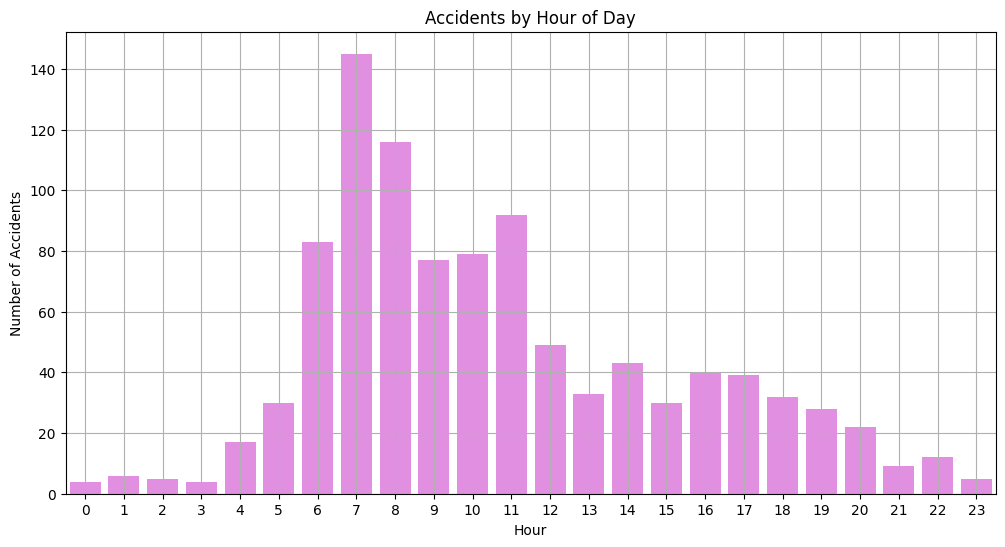

In [32]:
# Accidents by Hour
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Hour', color='violet')
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

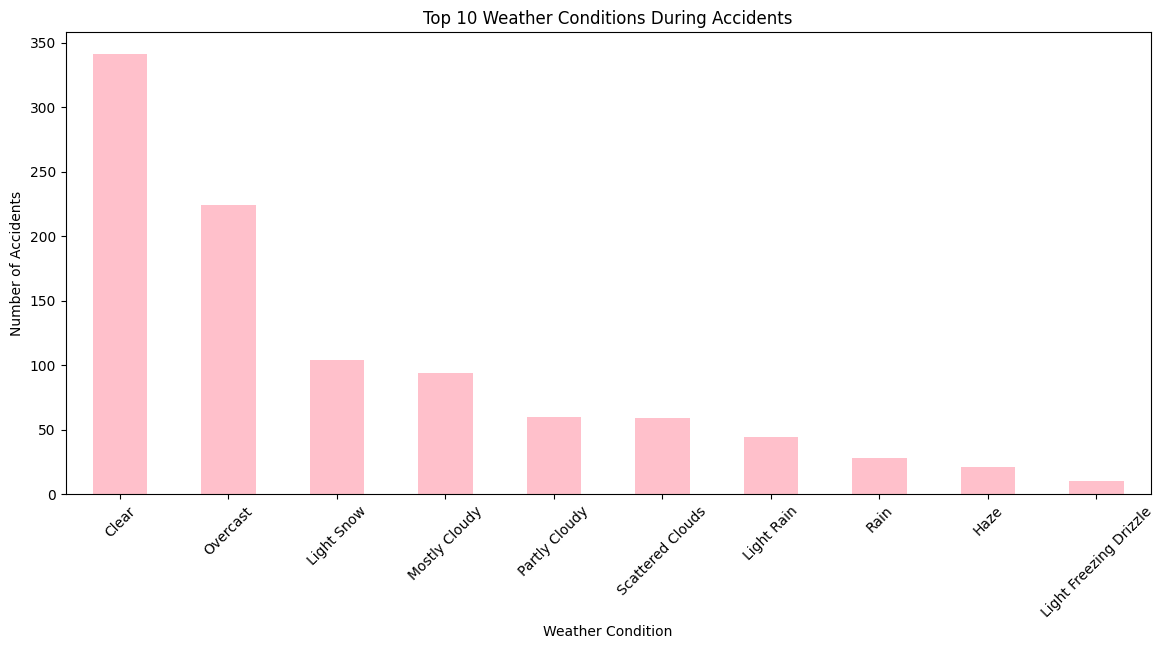

In [33]:
# Top 10 Weather Conditions with Accidents
plt.figure(figsize=(14, 6))
df['Weather_Condition'].value_counts().nlargest(10).plot(kind='bar', color='pink')
plt.title('Top 10 Weather Conditions During Accidents')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

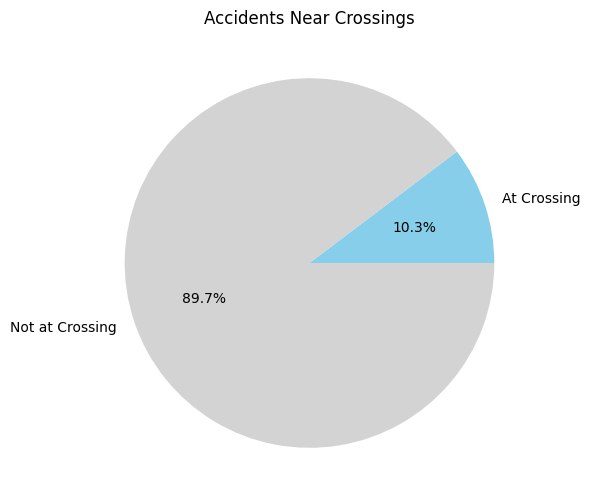

In [34]:
# Pie chart of accidents near crossings
labels = ['At Crossing', 'Not at Crossing']
sizes = [df['Crossing'].sum(), len(df) - df['Crossing'].sum()]
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightgray'])
plt.title('Accidents Near Crossings')
plt.show()

In [36]:
# Drop rows with missing coordinates
heatmap_df = df[['Start_Lat', 'Start_Lng']].dropna().sample(500)  # Sample for performance

# Create base map
map_osm = folium.Map(location=[39.50, -98.35], zoom_start=4)  # Center of US

# Add heatmap layer
HeatMap(data=heatmap_df[['Start_Lat', 'Start_Lng']].values, radius=8).add_to(map_osm)

# Show map
map_osm

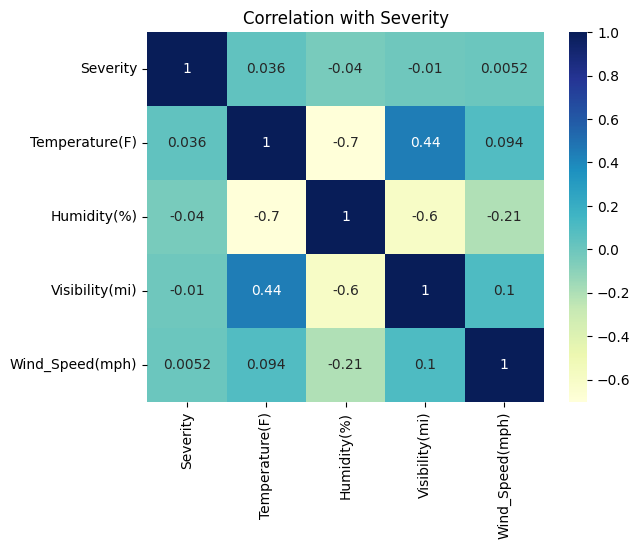

In [37]:
# Correlation with Severity
correlation = df[['Severity', 'Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Wind_Speed(mph)']].corr()
sns.heatmap(correlation, annot=True, cmap='YlGnBu')
plt.title('Correlation with Severity')
plt.show()